Choose your unit (wavenumber, wavelength, frequency): wavenumber
Choose your molecule: H2O
Choose your molecule number: 1
Choose your isotopologue number: 1
Choose your lower wavenumber bound: 1100
Choose your upper wavenumber bound: 1300
Scale (Log or Linear): Linear
Using data

CH4
                     Lines parsed: 863
O3
                     Lines parsed: 2756
CO
                     Lines parsed: 68
H2O
                     Lines parsed: 902
CO2
                     Lines parsed: 18213
O2
                     Lines parsed: 2189

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 1332
PROCESSED
Number of data lines used: 3996


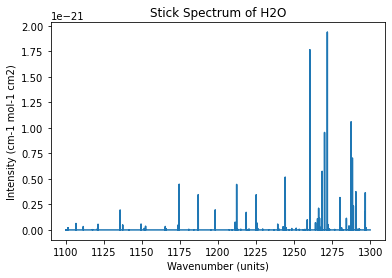

In [12]:
from hapi import *
import matplotlib.pyplot as plt
import numpy as np

# Function to fetch and plot data
def fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit='wavenumber'):
    
    db_begin('data')
 
    try:
        # Convert bounds according to chosen unit
        if unit.lower() == 'wavelength':
            lower_bound = 1e4 / upper_bound
            upper_bound = 1e4 / lower_bound
        elif unit.lower() == 'frequency':
            lower_bound = lower_bound * 1e9 / (3e10)
            upper_bound = upper_bound * 1e9 / (3e10)

        # Fetch the data
        fetch(molecule, molecule_number, isotopologue_number, lower_bound, upper_bound)
        
        # Retrieve data for plot
        x, y = getStickXY(molecule)

        # Convert x values according to chosen unit
        if unit.lower() == 'wavelength':
            x = 1e4 / np.array(x)
            sort_indices = np.argsort(x)
            x = x[sort_indices]
            y = y[sort_indices]
        elif unit.lower() == 'frequency':
            x = np.array(x) * 3e10 / 1e9

        # Display the number of data lines used
        print(f"Number of data lines used: {len(x)}")

        # Create the plot
        plt.plot(x, y)
        plt.title(f"Stick Spectrum of {molecule}")
        plt.xlabel(f"{unit.title()} (units)")
        plt.ylabel("Intensity (cm-1 mol-1 cm2)")
        if y_axis.lower() == 'log':
            plt.yscale('log')
        
        # Invert x-axis for wavelength
        if unit.lower() == 'wavelength':
            plt.gca().invert_xaxis()
        
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Function to handle user input
def user_input():
    # Let the user choose the unit
    unit = input("Choose your unit (wavenumber, wavelength, frequency): ")
    molecule = input("Choose your molecule: ")
    
    # Ensure the user enters a valid integer for the molecule number
    while True:
        try:
            molecule_number = int(input("Choose your molecule number: "))
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")
            
    # Ensure the user enters a valid integer for the isotopologue number
    while True:
        try:
            isotopologue_number = int(input("Choose your isotopologue number: "))
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")
            
    # Ensure the user enters a valid float for the bounds
    while True:
        try:
            lower_bound = float(input(f"Choose your lower {unit} bound: "))
            upper_bound = float(input(f"Choose your upper {unit} bound: "))
            break
        except ValueError:
            print("Invalid input. Please enter a float.")
            
    y_axis = input('Scale (Log or Linear): ')

    return molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit

# Call the functions
molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit = user_input()
fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit)


Choose your unit (wavenumber, wavelength, frequency): frequency
Choose your molecule: H2O
Choose your molecule number: 1
Choose your isotopologue number: 1
Choose your lower frequency bound: 30000
Choose your upper frequency bound: 39000
Scale (Log or Linear): Linear
Using data

CH4
                     Lines parsed: 863
O3
                     Lines parsed: 2756
CO
                     Lines parsed: 68
H2O
                     Lines parsed: 952
CO2
                     Lines parsed: 18213
O2
                     Lines parsed: 2189

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 1700
PROCESSED
Number of data lines used: 5100


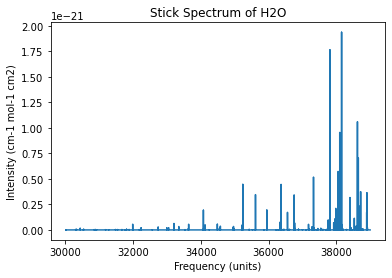

In [16]:
from hapi import *
import matplotlib.pyplot as plt
import numpy as np

def fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit):

    db_begin('data')

    try:
        # Convert bounds according to chosen unit
        if unit.lower() == 'wavelength':
            lower_bound = 1e4 / upper_bound
            upper_bound = 1e4 / lower_bound
        elif unit.lower() == 'frequency':
            lower_bound = lower_bound * 1e9 / (3e10)
            upper_bound = upper_bound * 1e9 / (3e10)

        # Fetch the data
        fetch(molecule, molecule_number, isotopologue_number, lower_bound, upper_bound)
        
        # Retrieve data for plot
        x, y = getStickXY(molecule)

        # Convert x values according to chosen unit
        if unit.lower() == 'wavelength':
            x = 1e4 / np.array(x)
            sort_indices = np.argsort(x)
            x = x[sort_indices]
            y = y[sort_indices]
        elif unit.lower() == 'frequency':
            x = np.array(x) * 3e10 / 1e9

        # Display the number of data lines used
        print(f"Number of data lines used: {len(x)}")

        # Create the plot
        plt.plot(x, y)
        plt.title(f"Stick Spectrum of {molecule}")
        plt.xlabel(f"{unit.title()} (units)")
        plt.ylabel("Intensity (cm-1 mol-1 cm2)")
        if y_axis.lower() == 'log':
            plt.yscale('log')
        
        # Invert x-axis for wavelength
        if unit.lower() == 'wavelength':
            plt.gca().invert_xaxis()
        
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

def user_input():
    # Let the user choose the unit
    unit = input("Choose your unit (wavenumber, wavelength, frequency): ")
    molecule = input("Choose your molecule: ")
    
    # Ensure the user enters a valid integer for the molecule number
    while True:
        try:
            molecule_number = int(input("Choose your molecule number: "))
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")
            
    # Ensure the user enters a valid integer for the isotopologue number
    while True:
        try:
            isotopologue_number = int(input("Choose your isotopologue number: "))
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")
            
    # Ensure the user enters a valid float for the bounds
    while True:
        try:
            lower_bound = float(input(f"Choose your lower {unit} bound: "))
            upper_bound = float(input(f"Choose your upper {unit} bound: "))
            break
        except ValueError:
            print("Invalid input. Please enter a float.")
            
    y_axis = input('Scale (Log or Linear): ')

    return molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit

# Call the functions
molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit = user_input()
fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_bound, upper_bound, y_axis, unit)


Choose unit type: 
1. Wavenumber
2. Wavelength
3. Frequency
Enter your choice (1/2/3): 3
Choose your molecule: H2O
Choose your molecule number: 1
Choose your isotopologue number: 1
Choose your lower frequency bound (in GHz): 30000
Choose your upper frequency bound (in GHz): 39000
Scale (Log or Linear): Linear
Using data

CH4
                     Lines parsed: 2189
O3
                     Lines parsed: 8114
H2O
                     Lines parsed: 63666
CO2
                     Lines parsed: 2189
O2
                     Lines parsed: 2189

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 1700
PROCESSED
Number of data lines used: 5100


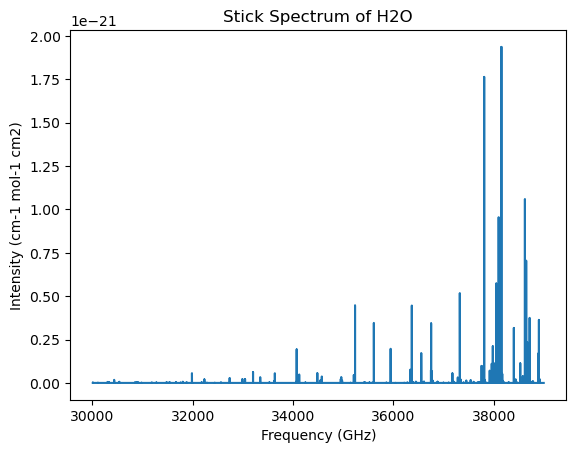

In [5]:
from hapi import *
import matplotlib.pyplot as plt
import numpy as np
    
def wavenumber_fuc():

    # Function to fetch and plot data
    def fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound, y_axis):

        db_begin('data')

        try:
            # Fetch the data
            fetch(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound)

            # Retrieve data for plot
            x, y = getStickXY(molecule)

            # Display the number of data lines used
            print(f"Number of data lines used: {len(x)}")

            # Create the plot
            plt.plot(x, y)
            plt.title(f"Stick Spectrum of {molecule}")
            plt.xlabel("Wavenumber (cm-1)")
            plt.ylabel("Intensity (cm-1 mol-1 cm2)")
            if y_axis.lower() == 'log':
                plt.yscale('log')
            plt.show()

        except Exception as e:
            print(f"An error occurred: {e}")

    # Function to handle user input
    def user_input():
        molecule = input("Choose your molecule: ")

        # Ensure the user enters a valid integer for the molecule number
        while True:
            try:
                molecule_number = int(input("Choose your molecule number: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        # Ensure the user enters a valid integer for the isotopologue number
        while True:
            try:
                isotopologue_number = int(input("Choose your isotopologue number: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        # Ensure the user enters a valid integer for the wavenumber bounds
        while True:
            try:
                lower_wavenumber_bound = int(input("Choose your lower wavenumber bound: "))
                upper_wavenumber_bound = int(input("Choose your upper wavenumber bound: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        y_axis = input('Scale (Log or Linear): ')

        return molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound, y_axis

    # Call the functions
    molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound, y_axis = user_input()
    fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound, y_axis)

def wavelength_fuc():

    # Function to fetch and plot data
    def fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_wavelength_bound, upper_wavelength_bound, y_axis):

        db_begin('data')

        try:
            # Convert wavelength bounds from microns to wavenumbers and invert the bounds
            lower_wavenumber_bound = 1e4 / upper_wavelength_bound
            upper_wavenumber_bound = 1e4 / lower_wavelength_bound

            # Fetch the data
            fetch(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound)

            # Retrieve data for plot
            x, y = getStickXY(molecule)

            # Convert wavenumber (cm-1) to wavelength (microns) and sort data
            x = 1e4 / np.array(x)
            sort_indices = np.argsort(x)
            x = x[sort_indices]
            y = y[sort_indices]

            # Display the number of data lines used
            print(f"Number of data lines used: {len(x)}")

            # Create the plot
            plt.plot(x, y)
            plt.title(f"Stick Spectrum of {molecule}")
            plt.xlabel("Wavelength (μm)")
            plt.ylabel("Intensity (cm-1 mol-1 cm2)")
            if y_axis.lower() == 'log':
                plt.yscale('log')

            # Invert x-axis
            plt.gca().invert_xaxis()
            plt.show()

        except Exception as e:
            print(f"An error occurred: {e}")

    # Function to handle user input
    def user_input():
        molecule = input("Choose your molecule: ")

        # Ensure the user enters a valid integer for the molecule number
        while True:
            try:
                molecule_number = int(input("Choose your molecule number: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        # Ensure the user enters a valid integer for the isotopologue number
        while True:
            try:
                isotopologue_number = int(input("Choose your isotopologue number: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        # Ensure the user enters a valid float for the wavelength bounds
        while True:
            try:
                lower_wavelength_bound = float(input("Choose your lower wavelength bound (in microns): "))
                upper_wavelength_bound = float(input("Choose your upper wavelength bound (in microns): "))
                break
            except ValueError:
                print("Invalid input. Please enter a float.")

        y_axis = input('Scale (Log or Linear): ')

        return molecule, molecule_number, isotopologue_number, lower_wavelength_bound, upper_wavelength_bound, y_axis

    # Call the functions
    molecule, molecule_number, isotopologue_number, lower_wavelength_bound, upper_wavelength_bound, y_axis = user_input()
    fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_wavelength_bound, upper_wavelength_bound, y_axis)

def frequency_fuction():

    # Function to fetch and plot data
    def fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_frequency_bound, upper_frequency_bound, y_axis):

        db_begin('data')

        try:
            # Convert frequency bounds from GHz to wavenumbers
            lower_wavenumber_bound = lower_frequency_bound * 1e9 / (3e10)
            upper_wavenumber_bound = upper_frequency_bound * 1e9 / (3e10)

            # Fetch the data
            fetch(molecule, molecule_number, isotopologue_number, lower_wavenumber_bound, upper_wavenumber_bound)

            # Retrieve data for plot
            x, y = getStickXY(molecule)

            # Convert wavenumber (cm-1) to frequency (GHz)
            x = np.array(x) * 3e10 / 1e9

            # Display the number of data lines used
            print(f"Number of data lines used: {len(x)}")

            # Create the plot
            plt.plot(x, y)
            plt.title(f"Stick Spectrum of {molecule}")
            plt.xlabel("Frequency (GHz)")
            plt.ylabel("Intensity (cm-1 mol-1 cm2)")
            if y_axis.lower() == 'log':
                plt.yscale('log')

            plt.show()

        except Exception as e:
            print(f"An error occurred: {e}")

    # Function to handle user input
    def user_input():
        molecule = input("Choose your molecule: ")

        # Ensure the user enters a valid integer for the molecule number
        while True:
            try:
                molecule_number = int(input("Choose your molecule number: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        # Ensure the user enters a valid integer for the isotopologue number
        while True:
            try:
                isotopologue_number = int(input("Choose your isotopologue number: "))
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")

        # Ensure the user enters a valid float for the frequency bounds
        while True:
            try:
                lower_frequency_bound = float(input("Choose your lower frequency bound (in GHz): "))
                upper_frequency_bound = float(input("Choose your upper frequency bound (in GHz): "))
                break
            except ValueError:
                print("Invalid input. Please enter a float.")

        y_axis = input('Scale (Log or Linear): ')

        return molecule, molecule_number, isotopologue_number, lower_frequency_bound, upper_frequency_bound, y_axis

    # Call the functions
    molecule, molecule_number, isotopologue_number, lower_frequency_bound, upper_frequency_bound, y_axis = user_input()
    fetch_and_plot(molecule, molecule_number, isotopologue_number, lower_frequency_bound, upper_frequency_bound, y_axis)

def choose_function():
    print("Choose unit type: \n1. Wavenumber\n2. Wavelength\n3. Frequency")

    while True:
        try:
            unit_type = int(input("Enter your choice (1/2/3): "))
            if unit_type in [1, 2, 3]:
                break
            else:
                print("Invalid input. Please enter 1, 2, or 3.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    unit_map = {1: wavenumber_fuc, 2: wavelength_fuc, 3: frequency_fuction}

    # Call the chosen function
    unit_map[unit_type]()

choose_function()
